In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("demographics.csv")

## Histograms

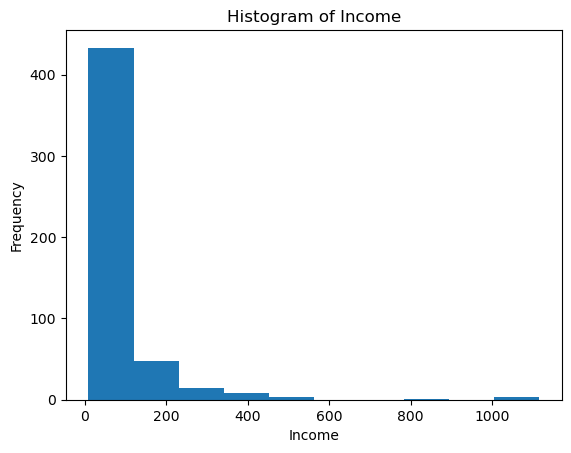

In [3]:
plt.hist(data['income'])
plt.title("Histogram of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

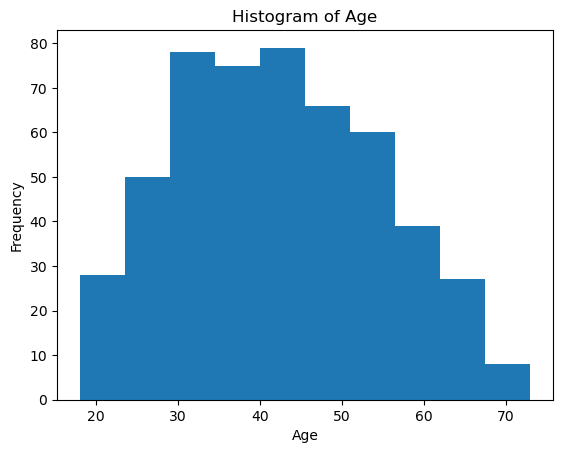

In [4]:
plt.hist(data['age'])
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

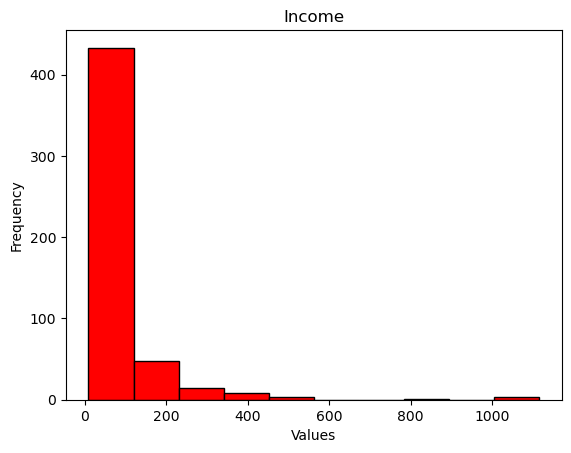

In [5]:
#  rənglərin dəyişdirilməsi

plt.hist(data['income'], color='red', edgecolor='black')
plt.title("Income")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

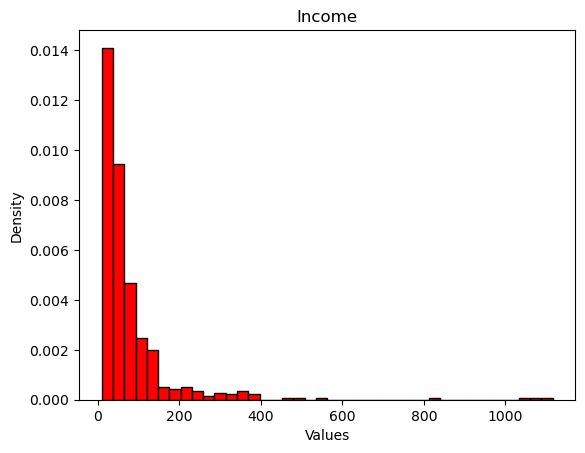

In [6]:
# y oxundakı sıxlıq

plt.hist(data['income'], bins=40, density=True, color='red', edgecolor='black')
plt.title("Income")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

## Kumulyativ tezlik xətti diaqramları

In [7]:
income_table = data['income'].value_counts().sort_index().reset_index()
income_table.head()

,income,count
0,9,2
1,10,3
2,11,6
3,13,4
4,14,3


In [8]:
income_table.columns = ['income', 'Freq']
income_table.head()

,income,Freq
0,9,2
1,10,3
2,11,6
3,13,4
4,14,3


In [9]:
# Kumulyativ sayları və faizlərin hesablanması

cumul = income_table['Freq'].cumsum()
cumul.head()

0     2
1     5
2    11
3    15
4    18
Name: Freq, dtype: int64

In [10]:
cumperc = cumul / len(data)
cumperc.head()

0    0.003922
1    0.009804
2    0.021569
3    0.029412
4    0.035294
Name: Freq, dtype: float64

In [11]:
# ilkin income_table matriksinə kumulyativ tezliklər sütununu əlavə edin

income_table['cumperc'] = cumperc
income_table.head()

,income,Freq,cumperc
0,9,2,0.003922
1,10,3,0.009804
2,11,6,0.021569
3,13,4,0.029412
4,14,3,0.035294


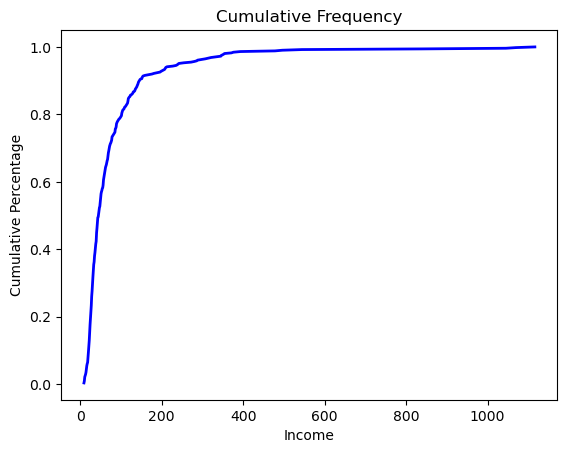

In [12]:
# kumulyativ tezliklər xəttini tərtib edin (hamar)

plt.plot(income_table['income'], income_table['cumperc'], color='blue', linewidth=2)
plt.title("Cumulative Frequency")
plt.xlabel("Income")
plt.ylabel("Cumulative Percentage")
plt.show()

In [13]:
# eyni analizi male və female üçün ayrı-ayrı edək

male = data[data['gender'] == "Male"]
female = data[data['gender'] == "Female"]

In [14]:
# Male 

income_table_male = male['income'].value_counts().sort_index().reset_index()
income_table_male.columns = ['income', 'Freq']
income_table_male['cumperc_m'] = income_table_male['Freq'].cumsum() / len(male)

In [15]:
# Female 

income_table_female = female['income'].value_counts().sort_index().reset_index()
income_table_female.columns = ['income', 'Freq']
income_table_female['cumperc_fm'] = income_table_female['Freq'].cumsum() / len(female)

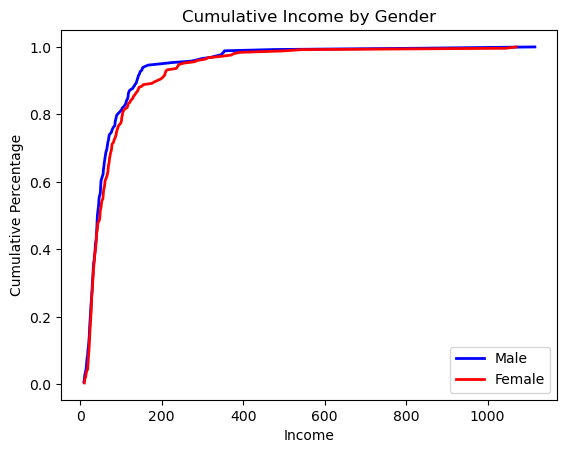

In [16]:
# diaqramın qurulması

plt.plot(income_table_male['income'], income_table_male['cumperc_m'], label='Male', color='blue', linewidth=2)
plt.plot(income_table_female['income'], income_table_female['cumperc_fm'], label='Female', color='red', linewidth=2)
plt.title("Cumulative Income by Gender")
plt.xlabel("Income")
plt.ylabel("Cumulative Percentage")
plt.legend(loc="lower right")
plt.show()

In [17]:
# plotnine(R'dakı ggplot2 paketinin eynisi) paketi ilə eyni qrafikin qurulması

from plotnine import *

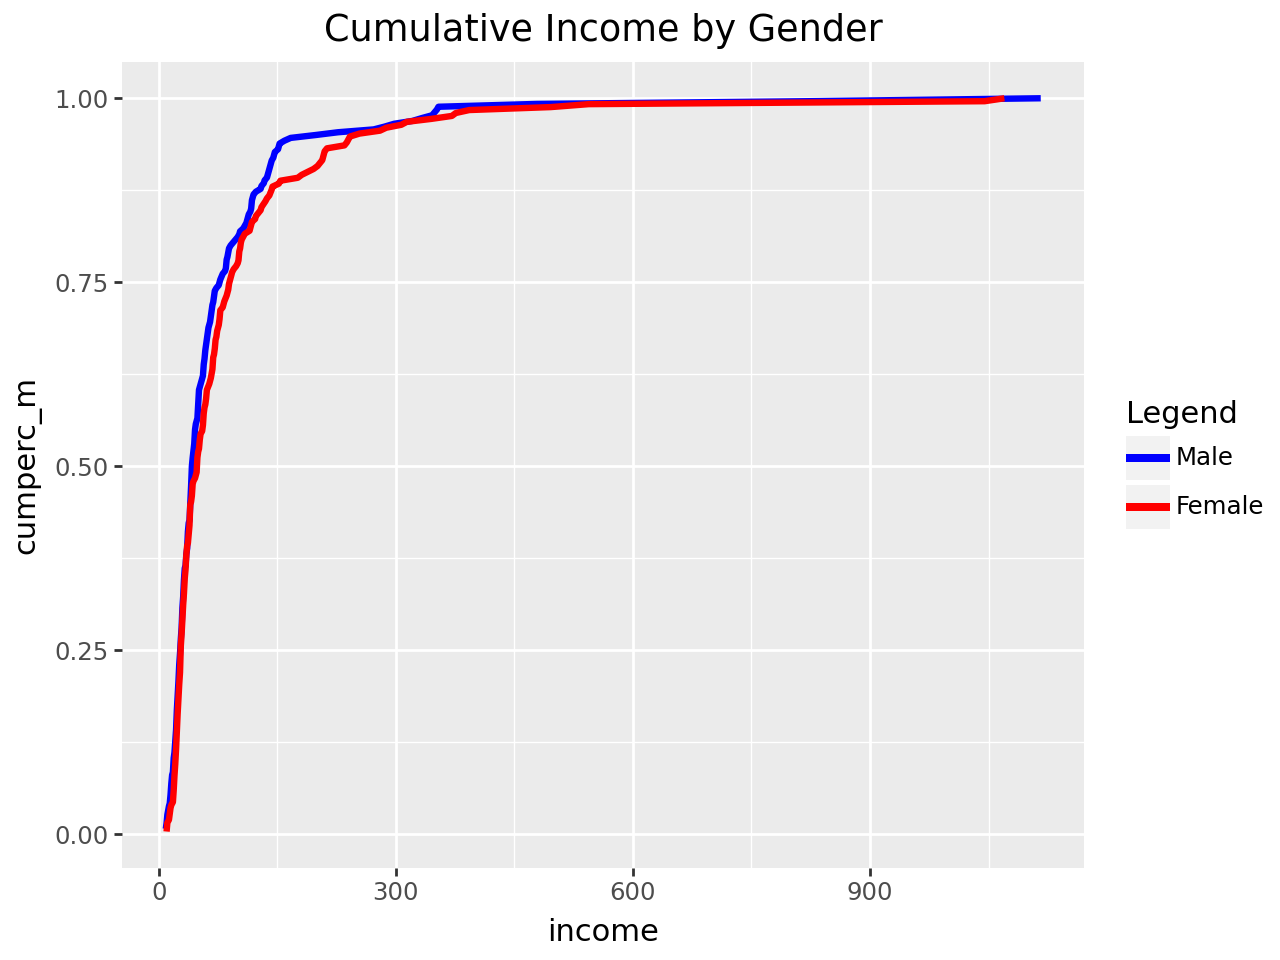

In [18]:
(
    ggplot() +
    geom_line(income_table_male, aes(x='income', y='cumperc_m', color='"Male"'), size=1.3) +
    geom_line(income_table_female, aes(x='income', y='cumperc_fm', color='"Female"'), size=1.3) +
    scale_color_manual(values={"Male": "blue", "Female": "red"}) +
    labs(title="Cumulative Income by Gender", color="Legend")
)

## "Boxplot" diaqramı

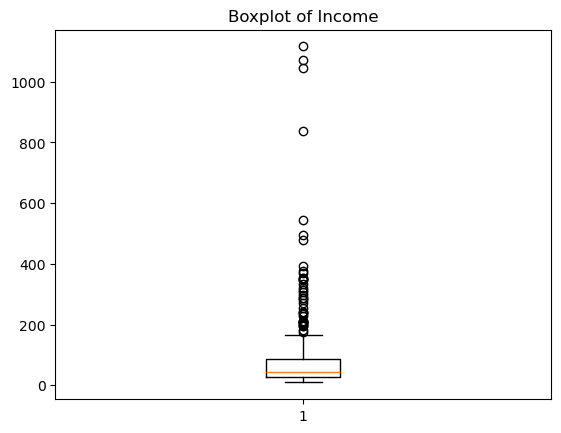

In [19]:
plt.boxplot(data['income'])
plt.title("Boxplot of Income")
plt.show()

In [20]:
Q1 = np.percentile(data['income'], 25)
Q3 = np.percentile(data['income'], 75)
IQR = Q3 - Q1
IQR

58.0

In [21]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
up_outliers = data[(data['income'] > upper_bound)]['income']
up_outliers

28      272
38      213
41      544
49      240
68      321
76     1116
78      376
94      209
96      478
110     181
147     176
149     837
154     352
177     208
184     371
188     354
201     298
211     286
213     307
216     196
227     204
238     207
240     288
249    1045
253     242
254     333
275     280
277     393
282     196
305     314
318     346
324     349
358     238
392     345
401     201
416     254
426    1070
440     235
441     210
460     198
496     227
505     496
Name: income, dtype: int64

In [23]:
down_outliers = data[(data['income'] < lower_bound)]['income']
down_outliers

Series([], Name: income, dtype: int64)

In [24]:
data.loc[data['income'].isin(up_outliers), 'income']

28      272
38      213
41      544
49      240
68      321
76     1116
78      376
94      209
96      478
110     181
147     176
149     837
154     352
177     208
184     371
188     354
201     298
211     286
213     307
216     196
227     204
238     207
240     288
249    1045
253     242
254     333
275     280
277     393
282     196
305     314
318     346
324     349
358     238
392     345
401     201
416     254
426    1070
440     235
441     210
460     198
496     227
505     496
Name: income, dtype: int64

In [25]:
data.loc[data['income'].isin(up_outliers), 'income'] = upper_bound
data.loc[data['income'].isin(down_outliers), 'income'] = lower_bound

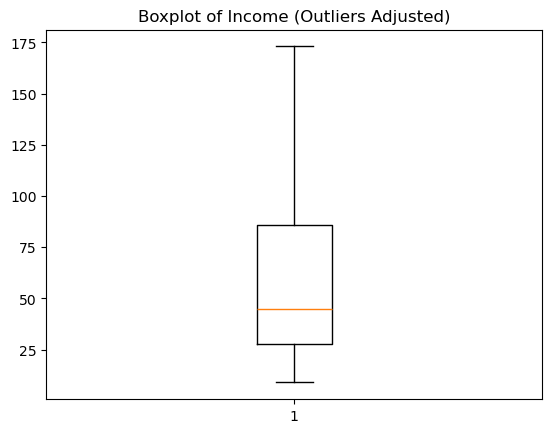

In [26]:
plt.boxplot(data['income'])
plt.title("Boxplot of Income (Outliers Adjusted)")
plt.show()

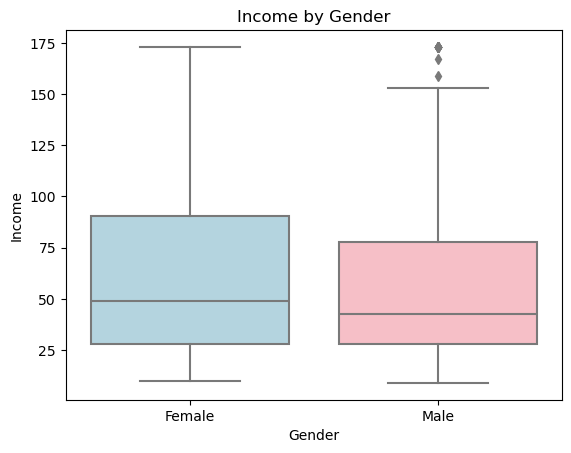

In [27]:
sns.boxplot(x='gender', y='income', data=data, palette={'Female': 'lightblue', 'Male': 'lightpink'})
plt.title("Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Income")
plt.show()

In [28]:
# outliers rənglənməsi (plotnine paketi ilə)

from plotnine import *

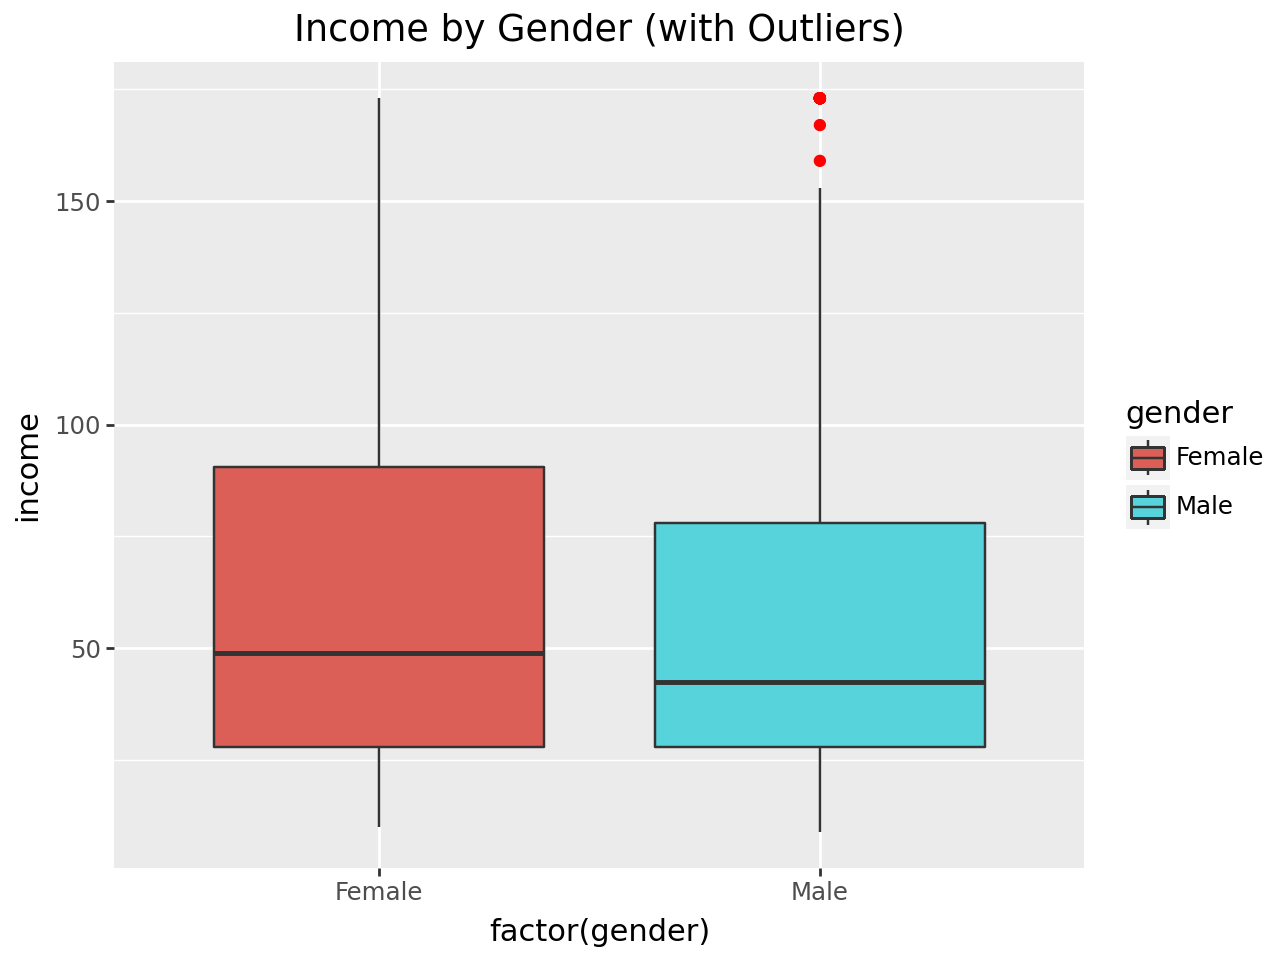

In [29]:
# outliers rənglənməsi (plotnine paketi ilə)

(
    ggplot(data) +
    geom_boxplot(aes(x='factor(gender)', y='income', fill='gender'), outlier_colour='red') +
    scale_x_discrete(labels=['Female', 'Male']) +
    labs(title="Income by Gender (with Outliers)")
)